### 1 background

This is a AB testing for product feature change analysis.

### 2 data source

* The data in test.xlsx file is for testing whether the product feature makes a significant change;
* The data in city.xlsx is for exploration analysis identifying operation issues in certain city. 

* The fields in datasets are as below
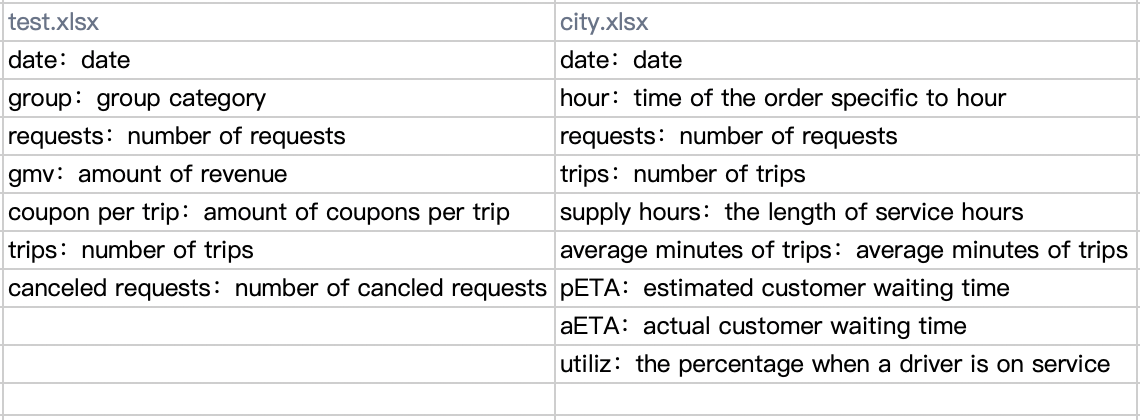

## Product Analytics:  AB Testing Analysis

### 1 data import

In [2]:
#A/B testing data import

import pandas as pd

test = pd.read_excel('/Users/minyan/Desktop/Python Project/didi ab testing/test.xlsx')
test.head()

,date,group,requests,gmv,coupon per trip,trips,canceled requests
0,2019-01-01,control,30,7486.620,1.069746,24,1
1,2019-01-02,control,152,38301.575,1.044199,121,8
2,2019-01-03,control,267,67768.425,1.032276,215,14
3,2019-01-04,control,369,94992.900,1.028196,298,19
4,2019-01-05,control,478,123236.875,1.011807,390,24


### 2 calculate ROI

In [3]:
#calculate ROI

test['ROI']=test['gmv']/(test['coupon per trip']*test['trips'])
test.head()

,date,group,requests,gmv,coupon per trip,trips,canceled requests,ROI
0,2019-01-01,control,30,7486.620,1.069746,24,1,291.604269
1,2019-01-02,control,152,38301.575,1.044199,121,8,303.143166
2,2019-01-03,control,267,67768.425,1.032276,215,14,305.346684
3,2019-01-04,control,369,94992.900,1.028196,298,19,310.026761
4,2019-01-05,control,478,123236.875,1.011807,390,24,312.304607


# Solution 1: parameter-based AB testing

### Measure product feature and define 3 key metrics:


* requests: numbers of trip requests users make before and after the product feature
* gmv: amount of company revenue before and after the product feature
* ROI:return on investment before and after the product feature

### 3 requests

#### 3.1 requests: test for variance 

1. The variances of requests for a, b groups are as c1, c2

2. Null hypotheisis H0：c1=c2；alternative hypothesis：H1：c1≠c2

3. alpha = 0.05

In [4]:
#test whether requests datasets between group a,b have equal variance: levene test

requests_A=test[test.group=='control'].requests
requests_B=test[test.group=='experiment'].requests

import scipy.stats as st
st.levene(requests_A,requests_B)

LeveneResult(statistic=0.014685075667736849, pvalue=0.903980667108546)

* p-value > 0.05. We can't reject null hypothesis. Variance of requests between group a,b is not significnatly differnt.

#### 3.2 requests: test for mean value

1. Use paired t-test.

2. The mean values of requests for group a, b are as u1, u2.

3. Null hypothesis H0：u1=u2; alternative hypothesis：H1：u1≠u2.

4. alpha = 0.05

In [5]:
#Paired t-test 

st.ttest_rel(requests_A,requests_B)

Ttest_relResult(statistic=1.6436140982479508, pvalue=0.11143970454099936)

* p-value > 0.05. We can't reject null hypothesis. Mean value of requests between group a,b is not significnatly differnt.

### 4 gmv

#### 4.1 gmv for variance

In [6]:
#test whether gmv datasets between group a,b have equal variance: levene test

gmv_A=test[test.group=='control'].gmv
gmv_B=test[test.group=='experiment'].gmv

st.levene(gmv_A,gmv_B)

LeveneResult(statistic=0.02865341299111212, pvalue=0.8661917430097603)

* p-value >0.05. We can't reject null hupothesis. Variance of GMV between group a,b is not significnatly differnt.

#### 4.2 gmv: test for mean value

In [7]:
#Paired t-test 
st.ttest_rel(gmv_A,gmv_B)

Ttest_relResult(statistic=4.247583846321442, pvalue=0.00021564303983362577)

* p-value<0.05，Reject null hypothesis. Mean value of GMV between group a,b is significnatly differnt.

### 5 ROI

#### 5.1 ROI: test for variance 

In [8]:
#test whether ROI datasets between group a,b have equal variance: levene test

ROI_A=test[test.group=='control'].ROI
ROI_B=test[test.group=='experiment'].ROI

st.levene(ROI_A,ROI_B)

LeveneResult(statistic=0.10363884745479335, pvalue=0.7487044961896305)

* p-value>0.05. We can't reject null hupothesis. The variance of ROI between group a,b is not significnatly differnt.

#### 5.2 ROI: test for mean value

In [9]:
#paired t-test
st.ttest_rel(ROI_A,ROI_B)

Ttest_relResult(statistic=10.305504459268173, pvalue=4.93261342734923e-11)

* p-value<0.05. Reject null hypothesis. The mean value of ROI between group a,b is significnatly different.

### Conclusion: the mean value of gmv, and ROI is significant different before and after this product feature. 
### This product feature has made significant different.

# Solution 2 : simulation for AB testing

### 6 Requests

In [20]:
import random

In [24]:
#calculate the mean difference
re_diff=test[test['group']== "control"]['requests'].mean()-test[test['group']== "experiment"]['requests'].mean()
re_diff

7.41379310344837

shufflaed label      control   experiment
requests         1936.586207  2155.862069
requests         2088.517241  2003.931034
requests         1791.758621  2300.689655
requests         1960.034483  2132.413793
requests         2102.931034  1989.517241
...                      ...          ...
requests         2132.689655  1959.758621
requests         2198.620690  1893.827586
requests         2133.517241  1958.931034
requests         2317.379310  1775.068966
requests         2010.758621  2081.689655

[1000 rows x 2 columns]


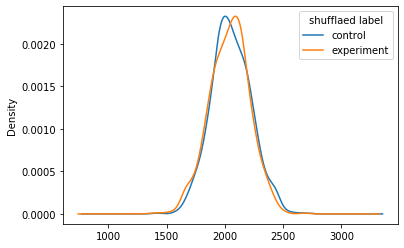

In [25]:
#create a list with shuffling means for each AB-group(shuffle the labels of group field)
requests=[]
re = test['group'].values.tolist()
#convert test['group'] to a list to apply random.shuffle()methods
#methods and implementatin as below
#re = test['group'].values.tolist()
#random.shuffle(re)
#print(re)

for i in range(1000):
    random.shuffle(re)
    test['shufflaed label']=re
    requests_mean=test.groupby('shufflaed label')['requests'].mean()
    requests.append(requests_mean)
    
#transform the list to a Dataframe
requests=pd.DataFrame(requests)
print(requests)

# A kernel Density estimate plot of the boostrap distributiona
requests.plot(kind='density')




Probablity that difference is greater than observed difference : 0.341


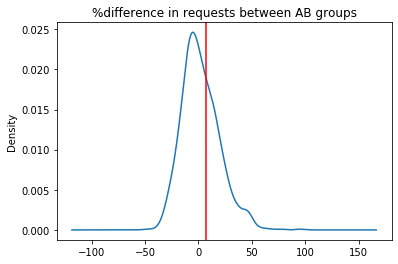

In [27]:
#add a column with the difference between AB group
requests['diff'] = (requests.control - requests.experiment)/requests.experiment*100

#plot the bootstrap % difference
ax = requests['diff'].plot(kind = 'density')
ax.set_title('%difference in requests between AB groups')
ax.axvline(x=re_diff, color= 'r')

#calculate the probablity that 1-day retention is greater when the gate is at level 30
print('Probablity that difference is greater than observed difference :', (requests['diff']>re_diff).mean())
#We can't reject Ho hypothesis because p-value>0.05, the difference is insignificant

In [29]:
print('We can not reject Ho hypothesis because p-value>0.05, the difference is insignificant')

We can not reject Ho hypothesis because p-value>0.05, the difference is insignificant


### 7 gmv

In [30]:
#calculate the mean difference
gmv_diff=test[test['group']== "control"]['gmv'].mean()-test[test['group']== "experiment"]['gmv'].mean()
gmv_diff

6111.165862069

shufflaed label        control     experiment
gmv              477501.640000  486634.388621
gmv              468317.084310  495818.944310
gmv              487150.577931  476985.450690
gmv              484891.357931  479244.670690
gmv              497798.731379  466337.297241
..                         ...            ...
gmv              447668.869828  516467.158793
gmv              543607.510690  420528.517931
gmv              397774.270862  566361.757759
gmv              550077.855172  414058.173448
gmv              500398.758103  463737.270517

[1000 rows x 2 columns]


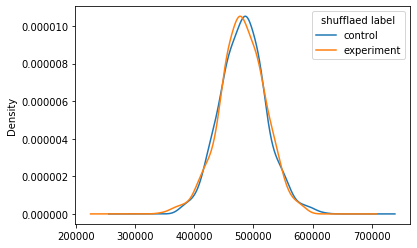

In [31]:
#create a list with shuffling means for each AB-group(shuffle the labels of group field)
gmv=[]
#convert test['group'] to a list to apply random.shuffle()methods
#methods and implementatin as below
#re = test['group'].values.tolist()
#random.shuffle(re)
#print(re)

for i in range(1000):
    random.shuffle(re)
    test['shufflaed label']=re
    gmv_mean=test.groupby('shufflaed label')['gmv'].mean()
    gmv.append(gmv_mean)
    
#transform the list to a Dataframe
gmv=pd.DataFrame(gmv)
print(gmv)

# A kernel Density estimate plot of the boostrap distributiona
gmv.plot(kind='density')


Probablity that difference is greater than observed difference : 0.0  We reject Ho hypothesis because p-value<0.05, the difference is significant. The product feature has made statistically significant different.


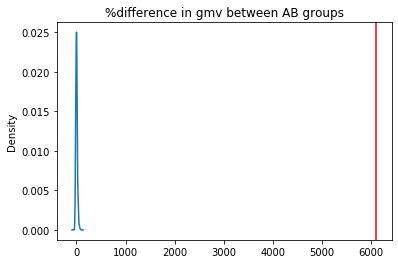

In [38]:
#add a column with the difference between AB group
gmv['diff'] = (gmv.control - gmv.experiment)/gmv.experiment*100

#plot the bootstrap % difference
ax = gmv['diff'].plot(kind = 'density')
ax.set_title('%difference in gmv between AB groups')
ax.axvline(x=gmv_diff, color= 'r')

#calculate the probablity that 1-day retention is greater when the gate is at level 30
print('Probablity that difference is greater than observed difference :', (gmv['diff']>gmv_diff).mean(), " We reject Ho hypothesis because p-value<0.05, the difference is significant. The product feature has made statistically significant different.")
#We reject Ho hypothesis because p-value<0.05, the difference is significant. The product feature has made statistically significant different.

### 8 ROI

In [39]:
#calculate the mean difference
ROI_diff=test[test['group']== "control"]['ROI'].mean()-test[test['group']== "experiment"]['ROI'].mean()
ROI_diff

8.68641686777056

shufflaed label     control  experiment
ROI              339.642326  372.405904
ROI              365.070144  346.978086
ROI              359.121515  352.926715
ROI              363.182394  348.865836
ROI              347.042271  365.005959
..                      ...         ...
ROI              361.611857  350.436373
ROI              363.693504  348.354726
ROI              358.508848  353.539381
ROI              355.620135  356.428095
ROI              357.554559  354.493671

[1000 rows x 2 columns]


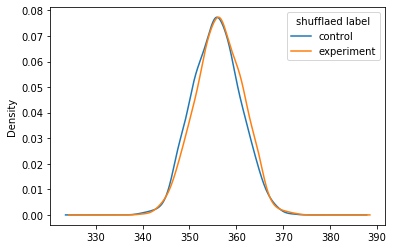

In [40]:
#create a list with shuffling means for each AB-group(shuffle the labels of group field)
ROI=[]
#convert test['group'] to a list to apply random.shuffle()methods
#methods and implementatin as below
#re = test['group'].values.tolist()
#random.shuffle(re)
#print(re)

for i in range(1000):
    random.shuffle(re)
    test['shufflaed label']=re
    ROI_mean=test.groupby('shufflaed label')['ROI'].mean()
    ROI.append(ROI_mean)
    
#transform the list to a Dataframe
ROI=pd.DataFrame(ROI)
print(ROI)

# A kernel Density estimate plot of the boostrap distributiona
ROI.plot(kind='density')



Probablity that difference is greater than observed difference : 0.001 We reject Ho hypothesis because p-value<0.05, the difference is significant. The product feature has made statistically significant different.


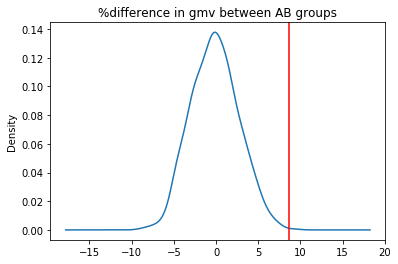

In [41]:
#add a column with the difference between AB group
ROI['diff'] = (ROI.control - ROI.experiment)/ROI.experiment*100

#plot the bootstrap % difference
ax = ROI['diff'].plot(kind = 'density')
ax.set_title('%difference in gmv between AB groups')
ax.axvline(x=ROI_diff, color= 'r')

#calculate the probablity that 1-day retention is greater when the gate is at level 30
print('Probablity that difference is greater than observed difference :', (ROI['diff']>ROI_diff).mean(),"We reject Ho hypothesis because p-value<0.05, the difference is significant. The product feature has made statistically significant different." )
#We reject Ho hypothesis because p-value<0.05, the difference is significant.

### Conclusion: the mean value of gmv, and ROI is significant different before and after this product feature. 
### ---->This product feature has made significant different.